# **Descriptive Analyses of Expenses for a family in the Netherlands**

The project is analysing the expenses of the family by using two different bank account transactions. In order to perform this analyses, the transaction of the two bank account, which are used both by the family, have been used. Transactions are xls and csv format. In each file, data keeps differently so in order to merge all data, data cleanng and wrangling were needed. data was collected from ABN AMRO and ING bank web applications.

# Bussiness Understanding


## Objectives

What is the descriptive anayses of expenses?

What are the expense types?

Wha is the highest expense label?

Why money can not be saved?

## Collecting the Data

The following libraries have been imported

In [1]:
######################### Below are the libraries that are used in order to perform EDA (Exploratory data analysis).
print("{:#^150}".format(" Importing Necessary Libraries "))
%matplotlib inline
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Datetime is a library that allows us to represent dates
import datetime

# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

import seaborn as sns                       #visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt             #visualisation
mpl.style.use("ggplot")
from os import listdir
from os.path import isfile, join
#from tkinter.filedialog import askdirectory
import time
from tqdm.notebook import tqdm

print("imported!!")

########################################################### Importing Necessary Libraries ############################################################
imported!!


### Defining Functions and Methods

In [2]:
###################################Functions and Methods
print("{:#^150}".format(" Defining Functions and Methods "))
# Definitions-------------
# This function finds the missing values for each attribute
def findMissingData(dataFrame):
    missing_data = dataFrame.isnull()
    #missing_data = dataFrame.isna()
    #print(missing_data.columns.values.tolist())
    
    for column in missing_data.columns.values.tolist(): 
        #print("******",missing_data[column].any())
        if str(missing_data[column].any()) == "True":
            print("-------",column,"-------")
            print("***There is MISSING data***")
            print(missing_data[column].value_counts())
        else:
         #   continue
            print("-------",column,"-------")
            print("There is NO missing data")
            #print(missing_data[column].value_counts())
        #print("")

# This function is formating the data frame column names and types. It produces day, month and year columns, sorting the data frame according to date.   
def cleaningProcess(dataFrame): #wrangling process
    """This function is formating the data frame column names and types. It produces day, month and year columns, sorting the data frame according to date."""
    print("--------> Process starts....")
    # 1. duplication remove
    print("--------> Removing duplicates")
    dataFrame.drop_duplicates(inplace=True)
   
    #make lowercase of the column names
    print("--------> Make lowercase of the column names")
    dataFrame.columns = map(str.lower, dataFrame.columns) 
    #remove whitespaces of the column names
    print("--------> Removing whitespaces of the column names")
    dataFrame.columns = dataFrame.columns.str.replace(' ', '')
    print("--------> Changing date column format")    
    dataFrame["date"] = pd.to_datetime(dataFrame["date"], format="%Y%m%d")
    print("--------> Creating separate day, month, year columns") 
    dataFrame["day"] = dataFrame["date"].dt.day_name()
    dataFrame["month"] = dataFrame["date"].dt.month_name()
    dataFrame["year"] = dataFrame["date"].dt.year
    print("--------> Sorting data by Date column and reseting index values") 
    dataFrame.sort_values(["date"], ignore_index=True, inplace=True)
    dataFrame.reset_index(drop=True, inplace=True)
    print("--------> Process Finished")
    return dataFrame

# This function is change the days and months columns' type as ordered categorical 
def dayMonthCategoryChange(dataFrame):
    ''' Converting "day" and "month" columns datatype to Category and ordered with day and month order'''
    #Change Day and Month columns from Object to Categorical and ordered
    months_categories = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    dataFrame["month"] = pd.Categorical(dataFrame["month"], categories = months_categories, ordered=True)
    days_categories = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    dataFrame["day"] = pd.Categorical(dataFrame["day"], categories = days_categories, ordered=True)

########################################################### Defining Functions and Methods ###########################################################


### Reading xls and csv files and create Data Frame

In [3]:
######################### Creating Dataframes for each ABN Amro and ING Bank from excel files
!pip install xlrd
print("{:#^150}".format(" Reading Excel Files and Creating Dataframes for both ABN Amro and ING Bank "))
mypath = r"D:\00_BACKUP_BY_DRIVE\Bank_expense_analysis\DATA"
files = listdir(mypath)
dataList_abn = [] #keeps every dataframes in one list
abnAmro = pd.DataFrame() #empty dataFrame
dataList_ing = [] #keeps every dataframes in one list
ingBank = pd.DataFrame() #empty dataFrame

for file in tqdm(files):
    
    if ".xls" in file:
        dataList_abn.append(pd.read_excel(mypath + "\\" + file))
        print(file, "-------> ABN AMRO")
        
    elif ".xlsx" in file:
        dataList_abn.append(pd.read_excel(mypath + "\\" + file))
        print(file, "-------> ABN AMRO")
        
    elif ".csv" in file:
        dataList_ing.append(pd.read_csv(mypath + "\\" + file, decimal = ",", sep = ";"))
        print(file, "-------> ING BANK")
        
    else:
        print(file, "--------------->This file is not valid")
    
abnAmro = pd.concat(dataList_abn) # Merge every dataframe in the list to the one dataframe
ingBank = pd.concat(dataList_ing) # Merge every dataframe in the list to the one dataframe
df_abnAmro = abnAmro.copy()
df_ingBank = ingBank.copy()

print("Dataframes, df_abnAmro and df_ingBank, have been created")
print("--------------------------------------------------------")

##################################### Reading Excel Files and Creating Dataframes for both ABN Amro and ING Bank #####################################


  0%|          | 0/21 [00:00<?, ?it/s]

ABNAMRO_20220101_20230101.xls -------> ABN AMRO
ABN_AMRO_DATA.xls -------> ABN AMRO
ABN_AMRO_DATAXLS230109103200.xls -------> ABN AMRO
ABN_AMRO_DATAXLS230125124527.xls -------> ABN AMRO
ABN_AMRO_XLS230205190654.xls -------> ABN AMRO
ABN_AMRO_XLS230209172238.xls -------> ABN AMRO
ABN_AMRO_XLS230224102548.xls -------> ABN AMRO
ABN_AMRO_XLS230321132159.xls -------> ABN AMRO
ABN_AMRO_XLS230324101153.xls -------> ABN AMRO
ABN_AMRO_XLS230414110432.xls -------> ABN AMRO
ABN_AMRO_XLS230526142356.xls -------> ABN AMRO
ABN_AMRO_XLS230613162335.xls -------> ABN AMRO
ABN_AMRO_XLS230613164027.xls -------> ABN AMRO
ING_NL79INGB0626712009_01-01-2021_08-01-2023.csv -------> ING BANK
ING_NL79INGB0626712009_01-01-2023_04-02-2023.csv -------> ING BANK
ING_NL79INGB0626712009_01-01-2023_13-04-2023.csv -------> ING BANK
ING_NL79INGB0626712009_01-02-2023_20-03-2023.csv -------> ING BANK
ING_NL79INGB0626712009_05-02-2023_08-02-2023.csv -------> ING BANK
ING_NL79INGB0626712009_14-04-2023_25-05-2023.csv -------

### Data Cleaning

In [4]:
########################## ABN AMRO
print("{:#^150}".format(" Cleaning ABN AMRO data "))
print("--------> ABN AMRO - removing unnecessary columns") 
df_abnAmro.drop(["accountNumber","mutationcode","valuedate"], inplace=True, axis = 1)
print("--------> ABN AMRO - renaming columns")         
df_abnAmro.rename(columns={"transactiondate":"date",
                           "startsaldo":"startbalance",
                           "endsaldo":"endbalance"}, inplace=True)    

# Label "Debit" for all records and if amount is greater than zero, labeled them "Credit"
df_abnAmro["debit_credit"] = "Debit" 
df_abnAmro.loc[df_abnAmro["amount"] > 0,["debit_credit"]] = "Credit"

# ABN Amro shows expenses as negative value. In order to show the values as pozitive, multiply by -1
df_abnAmro["amount"] = df_abnAmro["amount"].apply(lambda x : x*-1 if x<0 else x*1)

# Clean the data
cleaningProcess(df_abnAmro)

# Create "bankname" column to keep which bank was used for payment
df_abnAmro["bankname"] = "ABN AMRO"

# Category changing
dayMonthCategoryChange(df_abnAmro)

### Creating Name Column for abnAmro and Filled from Description Field
# Create "name" column to keep where the expense was done
df_abnAmro["name"] = np.nan

nameList = ["Jumbo","Albert Heijn", "Lidl", "Nettorama", "Aldi","Sioux Expats", "KINDERBIJSLAG", "Ozturk Fresh Food","Izmir", "Izzet", "Can Slagerij", "TAMOIL", "Shell", "TINQ", "TotalEnergies", "Total",
            "Esso","Action", "Hema", "Praxis", "solow", "Gamma", "Ikea", "Hornbach", "PRIMARK", "FirstXL", "H&M", "Primera", "So-Low", "Wibra", "ETOS", "McDonald's", "the Post", "Oakwood", "la Toscana",
            "the Brand", "Arif","Kruidvat", "Holland & Barrett","Decathlon", "Youfone", "REVOLT21", "Chiroprac","B-Fysic Andromeda", "Coolblue","Sioux","brabant water","KPN","Notariskantoor",
           "FBTO" , "REAAL" , "ANAC" , "ASR" , "SCHADEVERZEKERING" , "SCHADEV", "bol.com b.v.", "ABN AMRO", "ennatuurlijk b.v.","Q Park", "W.H.W. Volleman - van Geertruy","C&A","Den Ekkerman",
           "CCV Slagerij Zeraan","Mad Science Brabant by Sisow", "e. tasel", "Amazon", "PATHE", "gemeente Eindhoven", "City Sport", "INTERTOYS","ov-chipkaart","sge", "Jamin", "SAMSUNG",
            "Monkey Town Group","Boshuys", "Corendon","Ziya", "Step by Step", "Enthousiasment", "Expert", "BLOKKER", "ZOOPLUS", "GR-043-D","GR043D","Park","Las Salinas","Kwik Fit","EKC Afbouwmaterialen","Q Park","SPEELGOEDWINKEL"]

# Search the each name in the "nameList" in the "description" column. if this column contains the name, it is written in the "name" column in upper case 
for name in tqdm(nameList):
    df_abnAmro.loc[df_abnAmro["description"].str.contains(name, case=False), ["name"]] = name.upper()

print("--------> Cleaning ABN AMRO - completed")

############################# ING BANK
print("{:#^150}".format(" Cleaning ING Bank Data "))
print("--------> ING BANK - removing unnecessary columns")
df_ingBank.drop(["Tag","Account","Counterparty","Code", "Transaction type"], inplace=True, axis = 1)    
print("--------> ING BANK - renaming columns")
df_ingBank.rename(columns={"Amount (EUR)":"amount",
                           "Resulting balance":"endbalance",
                           "Name / Description":"name",
                           "Debit/credit": "debit_credit",
                           "Notifications":"description"}, inplace=True)


# Clean the data
cleaningProcess(df_ingBank)

#Calculate "startbalance"
df_ingBank.loc[df_ingBank["debit_credit"] == "Debit",["startbalance"]] = (df_ingBank["endbalance"] + df_ingBank["amount"])
df_ingBank.loc[df_ingBank["debit_credit"] == "Credit",["startbalance"]] = (df_ingBank["endbalance"] - df_ingBank["amount"])

# Create "bankname" column to keep which bank was used for payment
df_ingBank["bankname"] = "ING BANK"

# Category changing
dayMonthCategoryChange(df_ingBank)
print("--------> Cleaning ING BANK - completed")

######################################## Merging ABN and ING dataframes to df. 
print("{:#^150}".format(" Merging ABN AMRO and ING Bank Data Frames "))
#Concating two data frame to df
# Amounts that transfers from abn to ing have been deleted in order to affect the calculations wrongly.
df1 = df_abnAmro.drop(index = df_abnAmro.loc[(df_abnAmro["debit_credit"] == "Debit") & (df_abnAmro["description"].str.contains("NL79INGB0626712009"))].index)
df2 = df_ingBank.drop(index = df_ingBank.loc[(df_ingBank["debit_credit"] == "Credit") & (df_ingBank["description"].str.contains("NL20ABNA0887098665"))].index)

#Columns are renamed and ordered while concating
attOrder=["date","day","month","year","name","startbalance","endbalance","debit_credit","amount","description","bankname"]
df = pd.concat([df1[attOrder],df2[attOrder]], ignore_index=True)

# All records are sorting according to the "date" column
print("--------> Sorting data by Date column and reseting index values")
df["date"]=pd.to_datetime(df["date"]).dt.date # date column just only keep date, not time, YYYY-MM-DD
df.sort_values(["date"], ignore_index=True, inplace=True)

# Index is recreated
df.reset_index(drop=True, inplace=True)
print("--------> DataFrame df has been created")

# Delete temprorary created dataframes
del (df1,df2)


############################################################### Cleaning ABN AMRO data ###############################################################
--------> ABN AMRO - removing unnecessary columns
--------> ABN AMRO - renaming columns
--------> Process starts....
--------> Removing duplicates
--------> Make lowercase of the column names
--------> Removing whitespaces of the column names
--------> Changing date column format
--------> Creating separate day, month, year columns
--------> Sorting data by Date column and reseting index values
--------> Process Finished


  0%|          | 0/91 [00:00<?, ?it/s]

--------> Cleaning ABN AMRO - completed
############################################################### Cleaning ING Bank Data ###############################################################
--------> ING BANK - removing unnecessary columns
--------> ING BANK - renaming columns
--------> Process starts....
--------> Removing duplicates
--------> Make lowercase of the column names
--------> Removing whitespaces of the column names
--------> Changing date column format
--------> Creating separate day, month, year columns
--------> Sorting data by Date column and reseting index values
--------> Process Finished
--------> Cleaning ING BANK - completed
##################################################### Merging ABN AMRO and ING Bank Data Frames ######################################################
--------> Sorting data by Date column and reseting index values
--------> DataFrame df has been created


In [5]:
################################################## find number of months in each year
# According to the time when the data is downloaded, the number of months in a year is changing, not 12 for every year, in order to calculate mean expenses. So the number of months
# in each year has to be counted and kept in a dictionary
months = dict(df.groupby("year")["month"].unique())
numberofMonths = dict()
for i in months.keys():
    numberofMonths[i] = len(months[i])

# Converted into Data Frame
numberofmonths_df = pd.DataFrame({"year":numberofMonths.keys(),"numberofmonths":numberofMonths.values()}).set_index("year")

print("--------> Number of months for each year is calculated")
numberofmonths_df

--------> Number of months for each year is calculated


numberofmonths
year                
2021               6
2022              12
2023               6

In [6]:
########################################################    
# LABELING
# Every record has been labeled according to the type of the payment. Labels have been created manually.
print("{:#^150}".format(" Labeling started "))

# Some key words are being seached in first "description" column and then "name" column. If it contains, that record is labeled in "label" column
for i in ["description","name"]:
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Land:", case= False)),["label"]] = "Abroad"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Ozturk|Izmir|Izzet|Can Slagerij|CCV Slagerij Zeraan", case= False)),["label"]] = "Turk market"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("TAMOIL|Shell|TINQ|TotalEnergies|Total|Esso|ELAN", case= False)),["label"]] = "Fuel"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Jumbo|Albert Heijn|Lidl|Nettorama|Aldi|KEURSLAGERIJ|Supermarkt|KAUFLAND|Slijterij vd Heyden|Bazar|Holland Kaascentru|KAASHUIS", case= False)),["label"]] = "Grocery"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Action|hema|Praxis|solow|Gamma|Ikea|Hornbach|PRIMARK|FirstXL|H&M|H & M|Primera|So-Low|Wibra|ETOS|C&A|CASA|Nike|BLOKKER|Scapino|Mammut|Hilfiger|Xenos|Expert Veldhoven",
                                                               case= False)),["label"]] = "Store"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("McDonald's|Mc Donalds|the Post|Oakwood|la Toscana|the Brand|Arif|Las Salinas|Happy Italy|Buffel|Amigos BBQ|Ziyas Taste|Paviljoen Genneper|Cafetaria|\
    Five Guys|DUTCHHOMEMADE|Jamin|RESTAURANT|Stadspaviljoen|Welschap|Burgers|Sushipoint|Boshuys|Ziya|Snackbar|GRAND CAFE",case= False)),["label"]] = "Restaurant"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Kruidvat", case= False)),["label"]] = "Kruidvat"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Holland & Barrett", case= False)),["label"]] = "Holland & Barrett"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Decathlon", case= False)),["label"]] = "Decathlon"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("iDEAL|bol.com", case= False)),["label"]] = "Online Shopping"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Youfone", case= False)),["label"]] = "Youfone"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("TOYS|Bruna|SPEELGOEDWINKEL", case= False)),["label"]] = "Books&Toys"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("NL93INGB0000724779|NL07RABO0123168686|Doga|Step by Step", case= False)),["label"]] = "Courses"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Sioux", case= False)),["label"]] = "Sioux"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("ENNATUURLIJK|ENECO|KPN|brabant water|T-MOBILE", case= False)),["label"]] = "House Fixed Exp."
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("EKC Afbouwmaterialen|WoonEnzo|c. colleij", case= False)),["label"]] = "Furniture"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Notariskantoor", case= False)),["label"]] = "Notary"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("REVOLT21", case= False)),["label"]] = "REVOLUT"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Chiroprac|B-FYSIC|Maxima|NL60INGB0663263891|Apotheek", case= False)),["label"]] = "Health"  
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("NL32ABNA0455685711", case= False)),["label"]] = "House Rent"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("GR-043-D|gr043d|oostendorp|Kwik Fit|BELASTINGDIENST", case= False)),["label"]] = "Car"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Parking|Q Park|Parkmobile", case= False)),["label"]] = "Car Park"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Sport|Den Ekkerman|Laco|DéDé B.V.|City Spo", case= False)),["label"]] = "Sport"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("FBTO|REAAL|ANAC|ASR|SCHADEVERZEKERING|SCHADEV|Zilveren Kruis", case= False)),["label"]] = "Insurance"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("ING Hypotheken", case= False)),["label"]] = "Mortgage"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Kosten", case= False)),["label"]] = "ING Bank"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Basic Package", case= False)),["label"]] = "ABNAMRO Bank"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("OV-Chipkaart|NSAutomaat", case= False)),["label"]] = "Transportation"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Corendon|Airport", case= False)),["label"]] = "Airplane"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Geldmaat",case= False)),["label"]] = "Money Withdraw"  
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Tikkie|UCAK|ERKAN|Isiksal|Filoglu",case= False)),["label"]] = "Money Transfer" 
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Cinema|Pathe|Efteling",case= False)),["label"]] = "Cinema & Fun"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Camping",case= False)),["label"]] = "Holiday" 

df.loc[(df["debit_credit"]=="Credit"),["label"]] = "Payback"
df.loc[(df["debit_credit"]=="Credit") & (df["description"].str.contains("Sioux Expats", case= False)),["label"]] = "Income"
df.loc[(df["debit_credit"]=="Credit") & (df["description"].str.contains("KINDERBIJSLAG", case = False)),["label"]] = "Kinderbijslag"
findMissingData(df)
df.loc[df["label"].isna(),["label"]] = "Other Expenses"
df.loc[df["name"].isna(),["name"]] = "Other"

print(df["label"].unique())
print("{:#^150}".format(" LABELING FINISHED "))

df.info()
findMissingData(df)
df.to_csv("expenses.csv",index=False)
print("Data exported as expenses.csv")

################################################################## Labeling started ##################################################################
------- date -------
There is NO missing data
------- day -------
There is NO missing data
------- month -------
There is NO missing data
------- year -------
There is NO missing data
------- name -------
***There is MISSING data***
False    1562
True      432
Name: name, dtype: int64
------- startbalance -------
There is NO missing data
------- endbalance -------
There is NO missing data
------- debit_credit -------
There is NO missing data
------- amount -------
There is NO missing data
------- description -------
There is NO missing data
------- bankname -------
There is NO missing data
------- label -------
***There is MISSING data***
False    1786
True      208
Name: label, dtype: int64
['Grocery' 'Store' 'Restaurant' 'Furniture' 'Abroad' 'Insurance' 'Health'
 'Online Shopping' 'Other Expenses' 'Youfone' 'Sioux' 'Fuel' 'Income'
 'Tr

### SQL

In [10]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

In [11]:
%who

abnAmro	 attOrder	 cleaningProcess	 csv	 dataList_abn	 dataList_ing	 datetime	 dayMonthCategoryChange	 df	 
df_abnAmro	 df_ingBank	 file	 files	 findMissingData	 i	 ingBank	 isfile	 join	 
listdir	 months	 mpl	 mypath	 name	 nameList	 np	 numberofMonths	 numberofmonths_df	 
pd	 plt	 sns	 sqlite3	 time	 tqdm	 


In [14]:
#!pip install sqlalchemy==1.4.39
!pip install sqlalchemy 
!pip install ipython-sql 
import csv, sqlite3


  Using cached ipython_sql-0.5.0-py3-none-any.whl (20 kB)
  Using cached SQLAlchemy-2.0.15-cp310-cp310-win_amd64.whl (2.0 MB)
  Using cached sqlparse-0.4.4-py3-none-any.whl (41 kB)
  Using cached prettytable-3.7.0-py3-none-any.whl (27 kB)
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.4.39
    Uninstalling SQLAlchemy-1.4.39:
      Successfully uninstalled SQLAlchemy-1.4.39


In [15]:
%load_ext sql
con = sqlite3.connect("expences.db")
cur = con.cursor()
%sql sqlite:///expences.db


In [16]:
df.to_sql("ing_abn_expenses",con,if_exists="replace",index=False,method="multi")

1926

In [17]:
%sql SELECT "year", COUNT(*), SUM("amount") FROM "ing_abn_expenses" WHERE "debit_credit"='Debit' GROUP BY "year"

 * sqlite:///expences.db
Done.


[(2021, 439, 57494.43999999999),
 (2022, 1001, 70805.23999999993),
 (2023, 391, 28720.99)]

In [18]:
monthnumber=dict()
for year in [2021,2022,2023]:
    a= %sql SELECT COUNT(DISTINCT("month")) FROM "ing_abn_expenses" WHERE "year"={year}
    monthnumber[year]= a

 * sqlite:///expences.db
Done.
 * sqlite:///expences.db
Done.
 * sqlite:///expences.db
Done.


In [19]:
a

[(5,)]

In [20]:
monthnumber

{2021: [(6,)], 2022: [(12,)], 2023: [(5,)]}

In [21]:
df.drop(columns=["startbalance","endbalance"],axis=1, inplace=True)
df

date        day month  year                              name  \
0     2021-07-09     Friday  July  2021                             JUMBO   
1     2021-07-09     Friday  July  2021                            ACTION   
2     2021-07-09     Friday  July  2021                             JUMBO   
3     2021-07-09     Friday  July  2021                        LA TOSCANA   
4     2021-07-09     Friday  July  2021                             GAMMA   
...          ...        ...   ...   ...                               ...   
1921  2023-05-24  Wednesday   May  2023  Lidl 629 Eindhoven EINDHOVEN NLD   
1922  2023-05-24  Wednesday   May  2023            Youfone Nederland B.V.   
1923  2023-05-24  Wednesday   May  2023               T-MOBILE THUIS B.V.   
1924  2023-05-25   Thursday   May  2023                             SIOUX   
1925  2023-05-25   Thursday   May  2023     Restaurant Arif EINDHOVEN NLD   

     debit_credit   amount  \
0           Debit     0.49   
1           Debit    20.68   
2           Debit    12.87   
3           Debit     5.60   
4           Debit     2.69   
...           ...      ...   
1921        Debit    14.29   
1922        Debit    12.38   
1923        Debit    30.00   
1924       Credit  5737.14   
1925        Debit    37.00   

                                                                                                                                                                                                                                                                     description  \
0                                                                                                                                                                                                     BEA   NR:N179K7   09.07.21/12.55 Jumbo Eindh Boutensl,PAS551     EINDHOVEN   
1                                                                                                                                                                                                     BEA   NR:72327610 09.07.21/13.26 Action 1235,PAS541              Eindhoven   
2                                                                                                                                                                                                     BEA   NR:N179K7   09.07.21/13.52 Jumbo Eindh Boutensl,PAS551     EINDHOVEN   
3                                                                                                                                                                                                     BEA   NR:90168064 09.07.21/16.41 LA TOSCANA IJS,PAS551           EINDHOVEN   
4                                                                                                                                                                                                 BEA   NR:96BS02   09.07.21/19.26 GAMMA Son en Breugel (,PAS541   SON EN BREUGE   
...                                                                                                                                                                                                                                                                          ...   
1921                                                                                                                                                                             Card sequence no.: 001 24/05/2023 10:32 Transaction: B70167 Term: QF186H Value date: 24/05/2023   
1922  Name: Youfone Nederland B.V. Description: 1019519230 772344202305 IBAN: NL94RABO0303300000 Reference: SDD1C88AC88F4FC4F799079A24E50A194D1 Mandate ID: 94DF4FAADCFE4B64AAA4D4FFA52C759A Creditor ID: NL60ZZZ509468460000 Recurrent SEPA direct debit Value date: 24/05/2023   
1923                              Name: T-MOBILE THUIS B.V. Description: T-Mobile Thuis ZHZ89337 Factuur TMT1031422015 IBAN: NL95COBA0637055934 Reference: 501628176927 Mandate ID: ZHZ89337 Creditor ID: NL41ZZZ671825500000 Recurrent SEPA direc

# Descriptive Analysis

In [125]:
sum_expenses=pd.concat([df.loc[df["debit_credit"]=="Debit"].groupby(["year"]).sum("amount"),numberofmonths_df],axis=1)

In [126]:
sum_expenses

amount  numberofmonths
year                          
2021  57494.44               6
2022  70805.24              12
2023  28720.99               5

In [24]:
sum_expenses["averagedebit"]=sum_expenses["amount"]/sum_expenses["numberofmonths"]
sum_expenses

amount  numberofmonths  averagedebit
year                                        
2021  57494.44               6   9582.406667
2022  70805.24              12   5900.436667
2023  28720.99               5   5744.198000

### Data Visualization

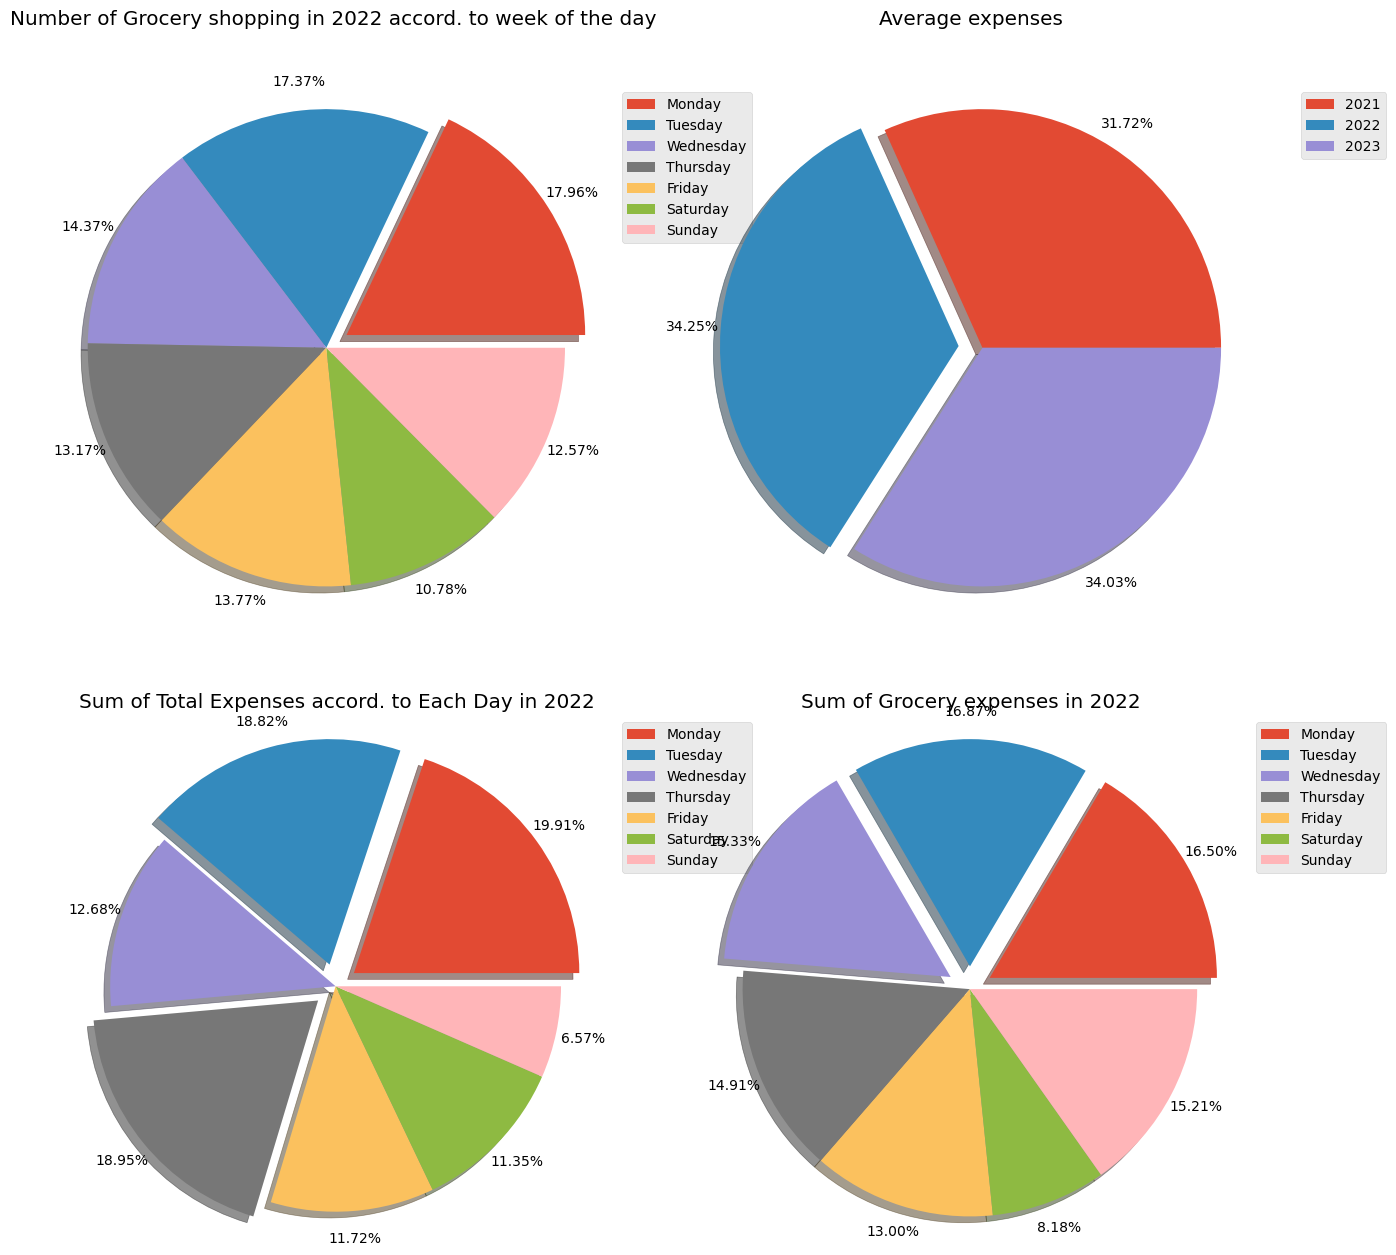

In [7]:
# Create Subplot figure 2x2 dimesion
%matplotlib inline
fig = plt.figure() # create figure
row_colum=[2,2]
ax0 = fig.add_subplot(row_colum[0], row_colum[1], 1) 
ax1 = fig.add_subplot(row_colum[0], row_colum[1], 2)
ax2 = fig.add_subplot(row_colum[0], row_colum[1], 3)
ax3 = fig.add_subplot(row_colum[0], row_colum[1], 4)
figsize=(15,15)

################ Subplot 1: ax0
chart_df = df.loc[(df["debit_credit"]=="Debit") & (df["year"] ==2022) & (df["label"] =="Grocery")].groupby(["day"])[["amount"]].count()
chart_df["amount"].plot(kind = "pie",
                        figsize=figsize,
                        labels = None, # turn off labels on pie chart
                        autopct='%0.02f%%',
                        shadow=True,         
                        pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                        #colors=[],  # add custom colors
                        explode=[0.1,0,0,0,0,0,0],
                        ax=ax0
                       )
# add legend
ax0.legend(labels=chart_df.index, loc='upper right', bbox_to_anchor=(0.3, 0, 1, 1))
# scale the title up by 12% to match pctdistance
ax0.set_title('Number of Grocery shopping in 2022 accord. to week of the day ', y=1.1)
ax0.set_ylabel("")
 

#plt.rcParams["figure.autolayout"] = True
ax0.axis('equal')



############### Subplot 2: ax1
sum_expenses=pd.concat([df.loc[(df["debit_credit"]=="Debit") & (df["label"] !="Notary")].groupby(["year"]).sum("amount"),numberofmonths_df],axis=1)
sum_expenses["averagedebit"]=sum_expenses["amount"]/sum_expenses["numberofmonths"]

sum_expenses["averagedebit"].plot(kind="pie",
                                  figsize=figsize,
                                  labels = None,
                                  autopct='%0.02f%%',
                                  shadow=True,         
                                  pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                                  #colors=[],  # add custom colors
                                  explode=[0,0.1,0], 
                                  ax=ax1)
# add legend
ax1.legend(labels=sum_expenses.index, loc='upper right', bbox_to_anchor=(0.3, 0, 1, 1))
ax1.set_title("Average expenses", y=1.1) 
ax1.set_ylabel("")
ax1.axis("equal")

############### ax2
chart_df = df.loc[(df["debit_credit"]=="Debit") & (df["year"] ==2022) & (df["label"] !="Mortgage")].groupby(["day"])[["amount"]].sum("amount")
chart_df["amount"].plot(kind = "pie",
                        figsize=figsize,
                        labels = None, # turn off labels on pie chart
                        autopct='%0.02f%%',
                        shadow=True,         
                        pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                        #colors=[],  # add custom colors
                        explode=[0.1,0.1,0,0.1,0,0,0],# 'explode' lowest 3 continents
                        ax= ax2
                       )
# add legend
ax2.legend(labels=chart_df.index, loc='upper right', bbox_to_anchor=(0.3, 0, 1, 1))     
ax2.set_title("Sum of Total Expenses accord. to Each Day in 2022") 
ax2.set_ylabel('')
ax2.axis("equal")
#################### ax3
chart_df = df.loc[(df["debit_credit"]=="Debit") & (df["year"] ==2022) & (df["label"] =="Grocery")].groupby(["day"])[["amount"]].sum("amount")
chart_df["amount"].plot(kind = "pie",
                        figsize=figsize,
                        labels = None, #chart_df["amount"].round(2), # turn off labels on pie chart
                        autopct='%0.02f%%',
                        shadow=True,         
                        pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                        #colors=[],  # add custom colors
                        explode=[0.1,0.1,0.1,0,0,0,0],# 'explode' lowest 3 continents
                        ax=ax3
                       )
# add legend
ax3.legend(labels=chart_df.index, loc='best', bbox_to_anchor=(0.3, 0, 1, 1)) 
ax3.set_title("Sum of Grocery expenses in 2022")
ax3.set_ylabel('')
ax3.axis("equal")
plt.show()

In [ ]:
df.loc[df["label"]=="Notary"]

In [26]:
df_date=df["date"].unique()
df_date=pd.DataFrame(df_date, columns=["date"])
df_date["date"]=pd.to_datetime(df["date"])
df_date["date"].dt.isocalendar()

year  week  day
0    2021    27    5
1    2021    27    5
2    2021    27    5
3    2021    27    5
4    2021    27    5
..    ...   ...  ...
568  2022     7    6
569  2022     7    6
570  2022     7    6
571  2022     7    6
572  2022     7    6

[573 rows x 3 columns]

In [28]:
def get_info(dataframe):
    
    print("----- shape -----")
    print("shape: ",dataframe.shape)
    
    print("-----null -----")
    print(dataframe.isnull().sum())
    
    print("------info----------")
    print(dataframe.info())
    
    print("------num cols------------")
    num_cols = dataframe.select_dtypes(include="number").columns
    print(num_cols.values)
    
    print("------categoric cols------------")
    cat_cols = dataframe.select_dtypes(include="object").columns
    print(cat_cols.values)

In [29]:
get_info(df)

----- shape -----
shape:  (1926, 10)
-----null -----
date            0
day             0
month           0
year            0
name            0
debit_credit    0
amount          0
description     0
bankname        0
label           0
dtype: int64
------info----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1926 entries, 0 to 1925
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   date          1926 non-null   object  
 1   day           1926 non-null   category
 2   month         1926 non-null   category
 3   year          1926 non-null   int64   
 4   name          1926 non-null   object  
 5   debit_credit  1926 non-null   object  
 6   amount        1926 non-null   float64 
 7   description   1926 non-null   object  
 8   bankname      1926 non-null   object  
 9   label         1926 non-null   object  
dtypes: category(2), float64(1), int64(1), object(6)
memory usage: 125.0+ KB
None
------num cols--

In [ ]:
df.loc[~df["day"].str.contains("Saturday|Sunday")]

(0.0, 60.0)

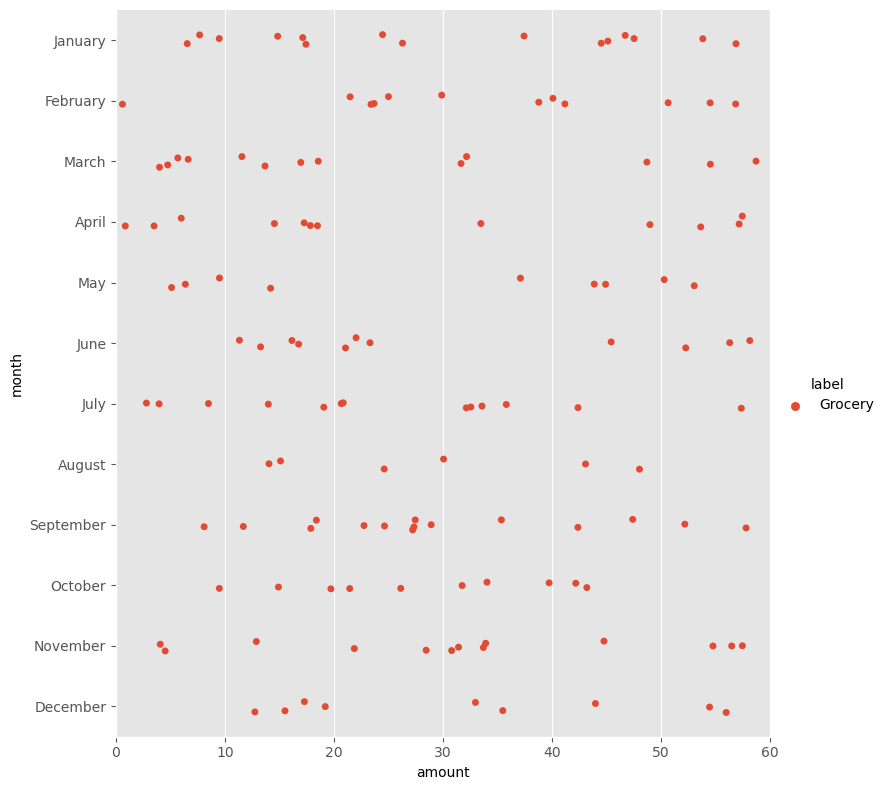

In [30]:
chart_df = df.loc[(df["debit_credit"]=="Debit") & (df["year"] ==2022) & (df["label"] !="Mortgage") & \
                  (df["label"] =="Grocery") & (df["amount"]>0)]
sns.catplot(data=chart_df, y="month",x="amount", hue="label", height=8)
plt.xlim(0,60)

In [40]:
df_debit= df.loc[(df["year"]>=2022) & (df["debit_credit"]=="Debit") & (df["label"] !="Mortgage")].groupby(by=["label","year"]).sum("amount").reset_index("year")
df_debit


year   amount
label                           
ABNAMRO Bank       2022    46.20
ABNAMRO Bank       2023    21.75
Abroad             2022   584.11
Airplane           2022    75.00
Airplane           2023  2355.58
Books&Toys         2022   547.75
Books&Toys         2023    57.84
Car                2022  1279.98
Car                2023   764.89
Car Park           2022   163.21
Car Park           2023   118.12
Cinema & Fun       2022    59.80
Cinema & Fun       2023    71.55
Courses            2022  1833.95
Courses            2023   434.30
Decathlon          2022   821.68
Decathlon          2023    34.99
Fuel               2022  1412.53
Fuel               2023   384.70
Grocery            2022  6373.00
Grocery            2023  3391.07
Health             2022   784.17
Health             2023   317.35
Holiday            2022   116.00
Holland & Barrett  2022   301.27
Holland & Barrett  2023    33.03
House Fixed Exp.   2022  4119.60
House Fixed Exp.   2023  1603.14
ING Bank           2022   138.50
ING Bank           2023    20.45
Insurance          2022  5723.02
Insurance          2023  2825.79
Kruidvat           2022  1503.70
Kruidvat           2023   394.24
Money Transfer     2022   562.49
Money Transfer     2023   557.25
Money Withdraw     2022   140.00
Money Withdraw     2023   280.00
Online Shopping    2022  5442.75
Online Shopping    2023  1582.26
Other Expenses     2022  2957.87
Other Expenses     2023   633.83
REVOLUT            2022  7000.00
REVOLUT            2023  2400.00
Restaurant         2022  1981.30
Restaurant         2023   428.40
Sioux              2022  1528.00
Sioux              2023   101.24
Sport              2022   765.92
Sport              2023   288.70
Store              2022  4638.13
Store              2023  1812.11
Transportation     2022   130.00
Turk market        2022  1794.30
Turk market        2023   299.40
Youfone            2022   222.33
Youfone            2023   109.56

In [81]:
df_barplot= df_debit.pivot(columns="year",values="amount")
df_barplot=df_barplot.fillna(0)
df_barplot

year                  2022     2023
label                              
ABNAMRO Bank         46.20    21.75
Abroad              584.11     0.00
Airplane             75.00  2355.58
Books&Toys          547.75    57.84
Car                1279.98   764.89
Car Park            163.21   118.12
Cinema & Fun         59.80    71.55
Courses            1833.95   434.30
Decathlon           821.68    34.99
Fuel               1412.53   384.70
Grocery            6373.00  3391.07
Health              784.17   317.35
Holiday             116.00     0.00
Holland & Barrett   301.27    33.03
House Fixed Exp.   4119.60  1603.14
ING Bank            138.50    20.45
Insurance          5723.02  2825.79
Kruidvat           1503.70   394.24
Money Transfer      562.49   557.25
Money Withdraw      140.00   280.00
Online Shopping    5442.75  1582.26
Other Expenses     2957.87   633.83
REVOLUT            7000.00  2400.00
Restaurant         1981.30   428.40
Sioux              1528.00   101.24
Sport               765.92   288.70
Store              4638.13  1812.11
Transportation      130.00     0.00
Turk market        1794.30   299.40
Youfone             222.33   109.56

<function matplotlib.pyplot.show(close=None, block=None)>

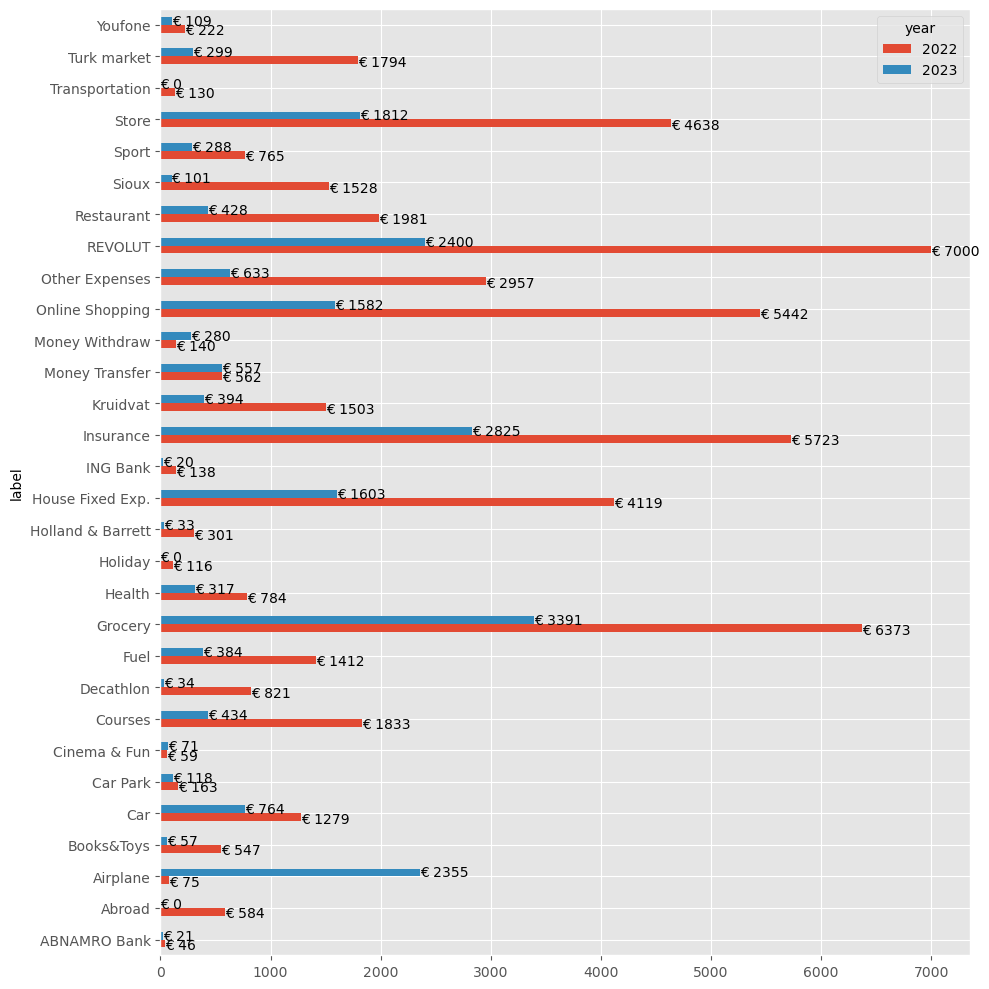

In [82]:
#df_debit= df.loc[(df["year"]>=2022) & (df["debit_credit"]=="Debit") & (df["label"] !="Mortgage")].groupby(["label"]).sum()
df_barplot.plot(kind="barh",figsize=(10,10))
for index, value in enumerate(df_barplot[2022]):
    #label=format(int(value),",")
    plt.annotate("\N{euro sign} "+ str(int(value)), xy=(value, index-0.3), color="black")
for index, value in enumerate(df_barplot[2023]):
    #label=format(int(value),",")
    plt.annotate("\N{euro sign} "+ str(int(value)), xy=(value, index), color="black")
plt.show

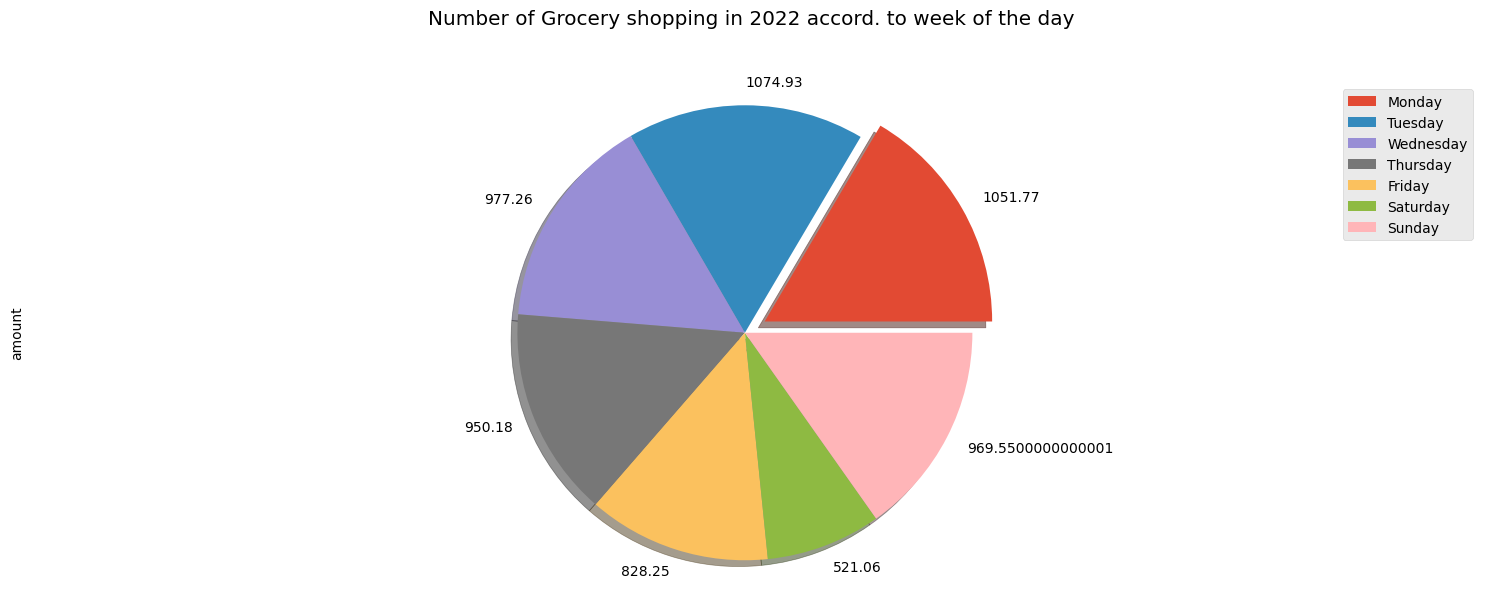

amount
day               
Monday     1051.77
Tuesday    1074.93
Wednesday   977.26
Thursday    950.18
Friday      828.25
Saturday    521.06
Sunday      969.55

In [45]:
chart_df = df.loc[(df["debit_credit"]=="Debit") & (df["year"] ==2022) & (df["label"] =="Grocery")].groupby(["day"])[["amount"]].sum()
chart_df["amount"].plot(kind = "pie",
                        figsize=(15, 6),
                        labels = chart_df["amount"], # turn off labels on pie chart
                        #autopct='%0.02f%%',
                        shadow=True,         
                        pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                        #colors=[],  # add custom colors
                        explode=[0.1,0,0,0,0,0,0] # 'explode' lowest 3 continents
                       )
# scale the title up by 12% to match pctdistance
plt.title('Number of Grocery shopping in 2022 accord. to week of the day ', y=1.1) 

#plt.rcParams["figure.autolayout"] = True
plt.axis('equal')

# add legend
plt.legend(labels=chart_df.index, loc='best') 

plt.show()
chart_df

<Axes: ylabel='date'>

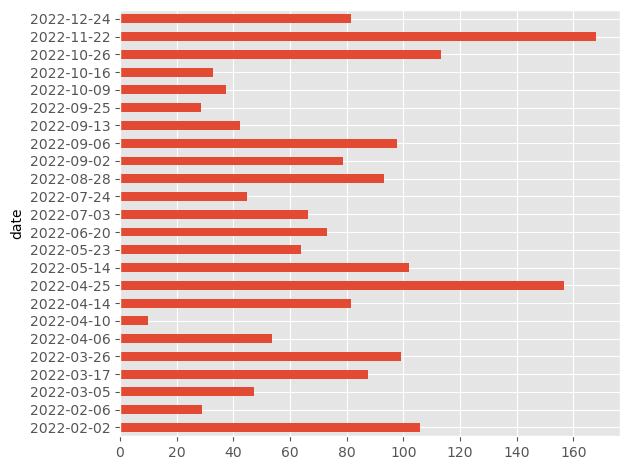

In [52]:
df.loc[(df["debit_credit"]=="Debit") & (df["year"] ==2022) & (df["label"] =="Turk market")].groupby("date").sum("amount")["amount"].plot(kind="barh")

In [60]:
df_f=df.loc[(df["debit_credit"]=="Debit") & (df["year"]==2022)].groupby("day").sum("amount")[["amount"]]
df_f

amount
day                
Monday     15001.52
Tuesday    15903.82
Wednesday   8204.02
Thursday   13012.38
Friday      9178.58
Saturday    6021.53
Sunday      3483.39

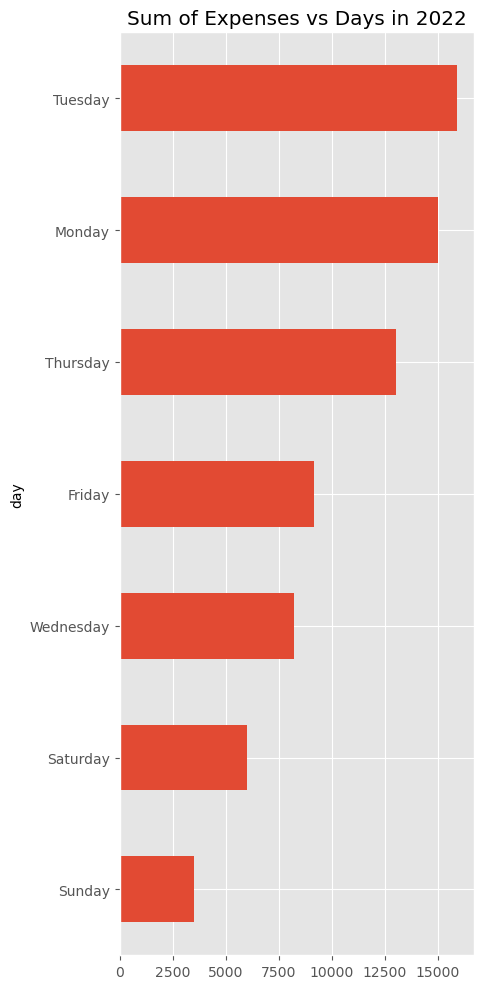

In [63]:
df.loc[(df["debit_credit"]=="Debit") & (df["year"]==2022)].groupby("day")["amount"]\
.sum().sort_values(ascending=False).sort_values().plot(kind="barh",figsize = (5,10), title="Sum of Expenses vs Days in 2022",grid=True)
plt.show()

In [ ]:
#df.loc[(df["Debit/credit"]=="Debit") & (df["Year"]==2022) & (df["Month"]=="January")]
with pd.ExcelWriter('output1.xlsx') as writer:  
    df.loc[(df["Debit/credit"]=="Debit") & (df["Year"]==2022) & (df["Month"]=="January")].to_excel(writer, sheet_name="all")
    #df_income.to_excel(writer, sheet_name='income')
    #df_expense.to_excel(writer, sheet_name='expense')

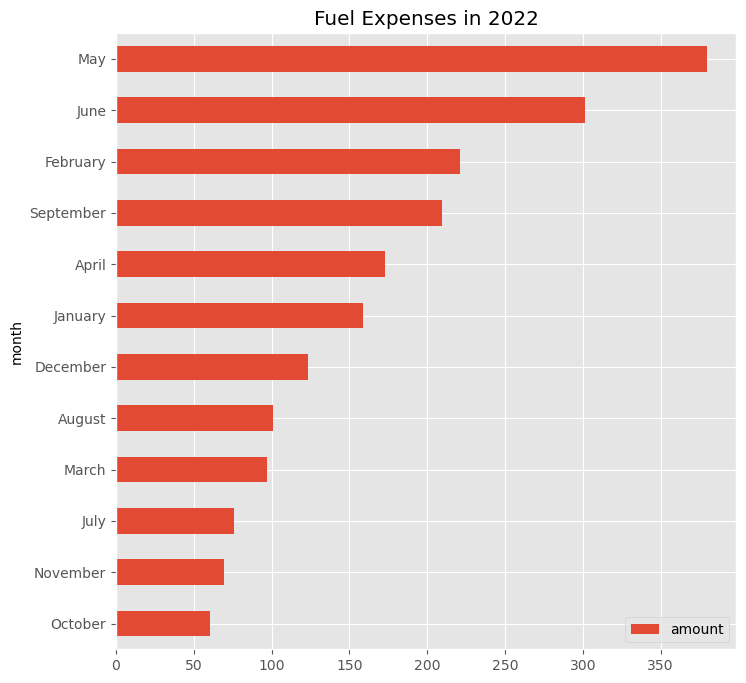

amount
month            
January    158.65
February   221.38
March       96.92
April      172.57
May        379.54
June       301.36
July        76.03
August     100.66
September  209.43
October     60.17
November    69.10
December   123.41

In [8]:
df_query=df.loc[(df["debit_credit"]=="Debit") & (df["year"]>=2022) & (df["label"]=="Fuel")].groupby(["month"])[["amount"]].sum("amount")
df_query.sort_values("amount").plot(kind="barh",figsize = (8,8), title="Fuel Expenses in 2022")
plt.show()
df_query


Text(0.5, 1.0, 'Minimum Value of Fuel Expenses')

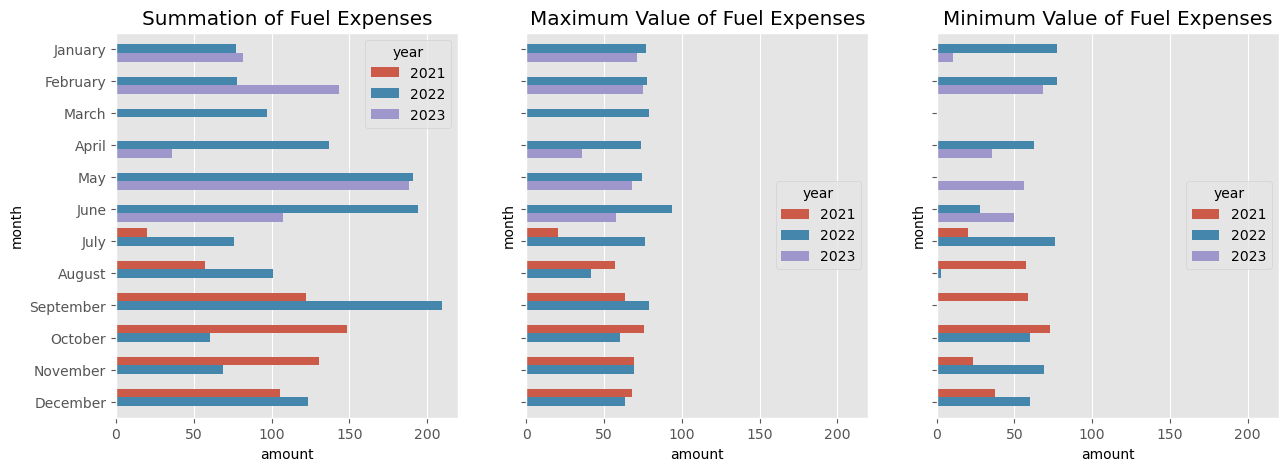

In [11]:
fig, ax = plt.subplots(1,3, figsize=(15,5),sharey=True, sharex=True)
df_filter=df.loc[(df["debit_credit"]=="Debit") & (df["label"]=="Fuel")]
sns.barplot(x=df_filter["amount"],y=df_filter["month"],hue=df_filter["year"],estimator=sum, errorbar=None, ax=ax[0])
sns.barplot(x=df_filter["amount"],y=df_filter["month"],hue=df_filter["year"],estimator="max", errorbar=None, ax=ax[1])
sns.barplot(x=df_filter["amount"],y=df_filter["month"],hue=df_filter["year"],estimator="min", errorbar=None, ax=ax[2])
ax[0].set_title("Summation of Fuel Expenses")
ax[1].set_title("Maximum Value of Fuel Expenses")
ax[2].set_title("Minimum Value of Fuel Expenses")

In [10]:
df.loc[(df["debit_credit"]=="Debit") & (df["label"]=="Fuel") & (df["month"]=="September")]

date        day      month  year    name  startbalance  \
104   2021-09-11   Saturday  September  2021  TAMOIL      38824.85   
160   2021-09-25   Saturday  September  2021   SHELL      15469.51   
1174  2022-09-03   Saturday  September  2022    ESSO       5368.25   
1175  2022-09-03   Saturday  September  2022   SHELL       5428.20   
1211  2022-09-14  Wednesday  September  2022   SHELL       4153.38   
1264  2022-09-30     Friday  September  2022    TINQ       5363.59   

      endbalance debit_credit  amount  \
104     38761.47        Debit   63.38   
160     15410.47        Debit   59.04   
1174     5367.05        Debit    1.20   
1175     5368.25        Debit   59.95   
1211     4083.92        Debit   69.46   
1264     5284.77        Debit   78.82   

                                                                                                      description  \
104                                    BEA   NR:730N64   11.09.21/10.49 TAMOIL EINDHOVEN,PAS551         EINDHOVEN   
160                                    BEA   NR:9G5F1W   25.09.21/13.30 Shell E Veldhoven,PAS551        VELDHOVEN   
1174       BEA, Betaalpas                   Esso Havelte,PAS541             NR:26R19P   03.09.22/13.35       DARP   
1175  BEA, Betaalpas                   Shell E Veldhoven,PAS541        NR:9G5F1W   03.09.22/10.08       VELDHOVEN   
1211  BEA, Betaalpas                   Shell E Veldhoven,PAS551        NR:9G5F1W   14.09.22/09.13       VELDHOVEN   
1264  BEA, Betaalpas                   TINQ EINDHOVENSEWEG EI,PAS551   NR:21121651 30.09.22/08.52       EINDHOVEN   

      bankname label  
104   ABN AMRO  Fuel  
160   ABN AMRO  Fuel  
1174  ABN AMRO  Fuel  
1175  ABN AMRO  Fuel  
1211  ABN AMRO  Fuel  
1264  ABN AMRO  Fuel

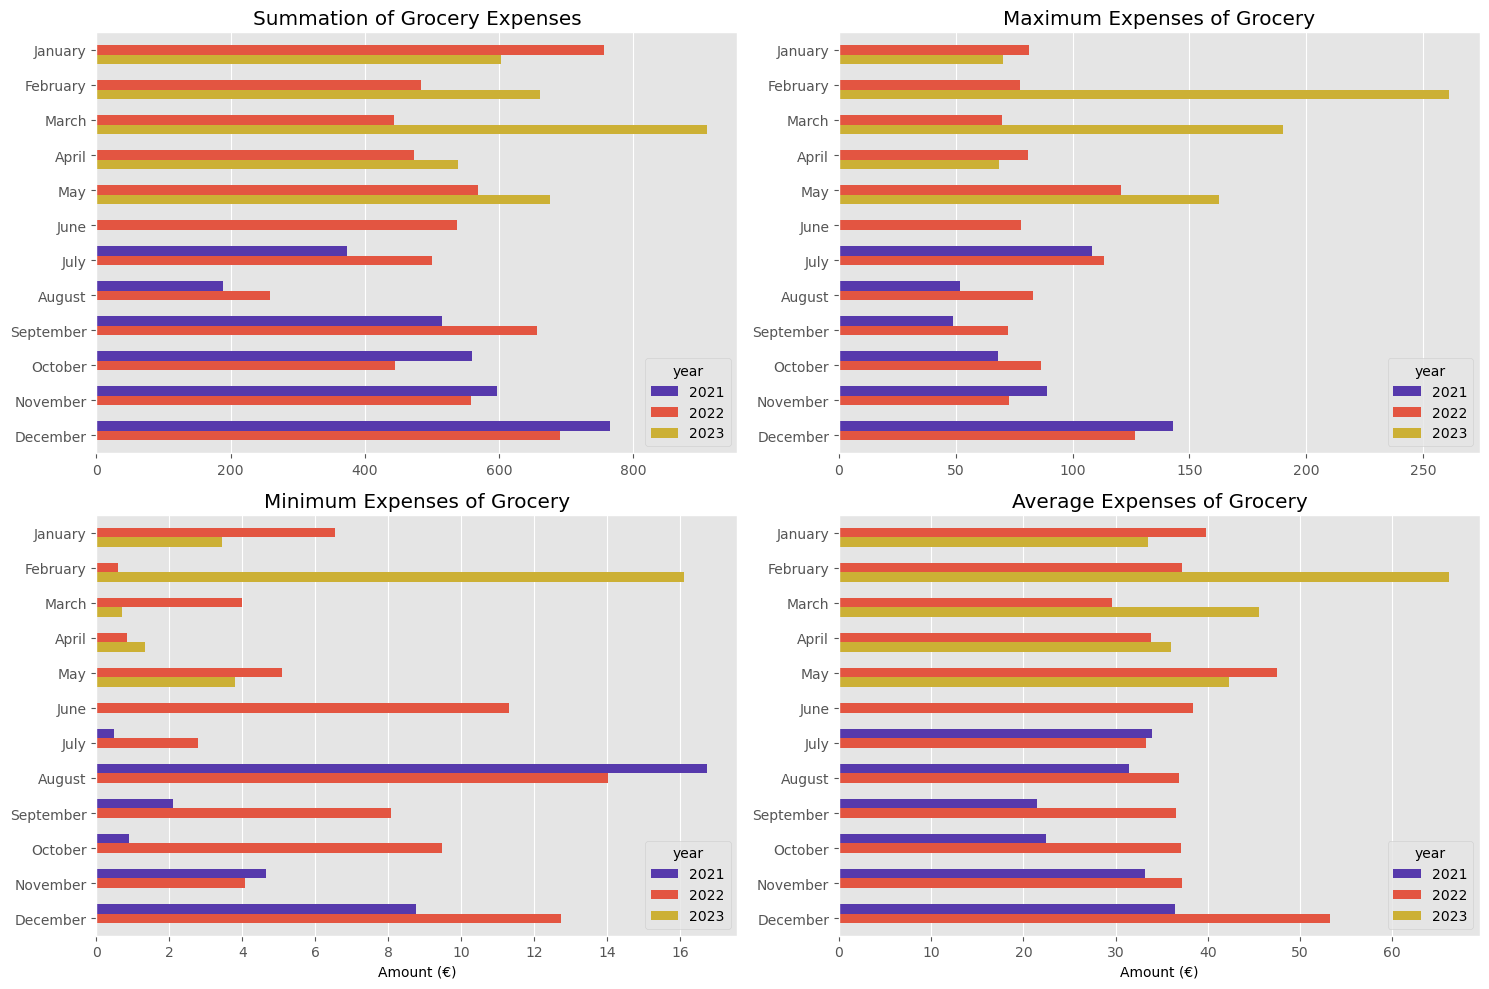

In [92]:
# Create Subplot figure 2x2 dimesion
%matplotlib inline
fig = plt.figure(figsize=(15,10)) # create figure
row_colum=[2,2]
ax0 = fig.add_subplot(row_colum[0], row_colum[1], 1) 
ax1 = fig.add_subplot(row_colum[0], row_colum[1], 2)
ax2 = fig.add_subplot(row_colum[0], row_colum[1], 3)
ax3 = fig.add_subplot(row_colum[0], row_colum[1], 4)

df_filter=df.loc[(df["debit_credit"]=="Debit") & (df["label"]=="Grocery")]
palette="CMRmap"
sns.barplot(x=df_filter["amount"],y=df_filter["month"],hue=df_filter["year"],estimator=sum, errorbar=None, ax=ax0, palette=palette)
sns.barplot(x=df_filter["amount"],y=df_filter["month"],hue=df_filter["year"],estimator="max", errorbar=None, ax=ax1, palette=palette)
sns.barplot(x=df_filter["amount"],y=df_filter["month"],hue=df_filter["year"],estimator="min", errorbar=None, ax=ax2, palette=palette)
sns.barplot(x=df_filter["amount"],y=df_filter["month"],hue=df_filter["year"],estimator="mean", errorbar=None, ax=ax3, palette=palette)
ax0.set_title("Summation of Grocery Expenses")
ax1.set_title("Maximum Expenses of Grocery")
ax2.set_title("Minimum Expenses of Grocery")
ax3.set_title("Average Expenses of Grocery")

for i in [ax0,ax1,ax2,ax3]:
    i.set_ylabel("")
    i.set_xlabel("")
for i in [ax2,ax3]:
    i.set_xlabel("Amount (\N{euro sign})")

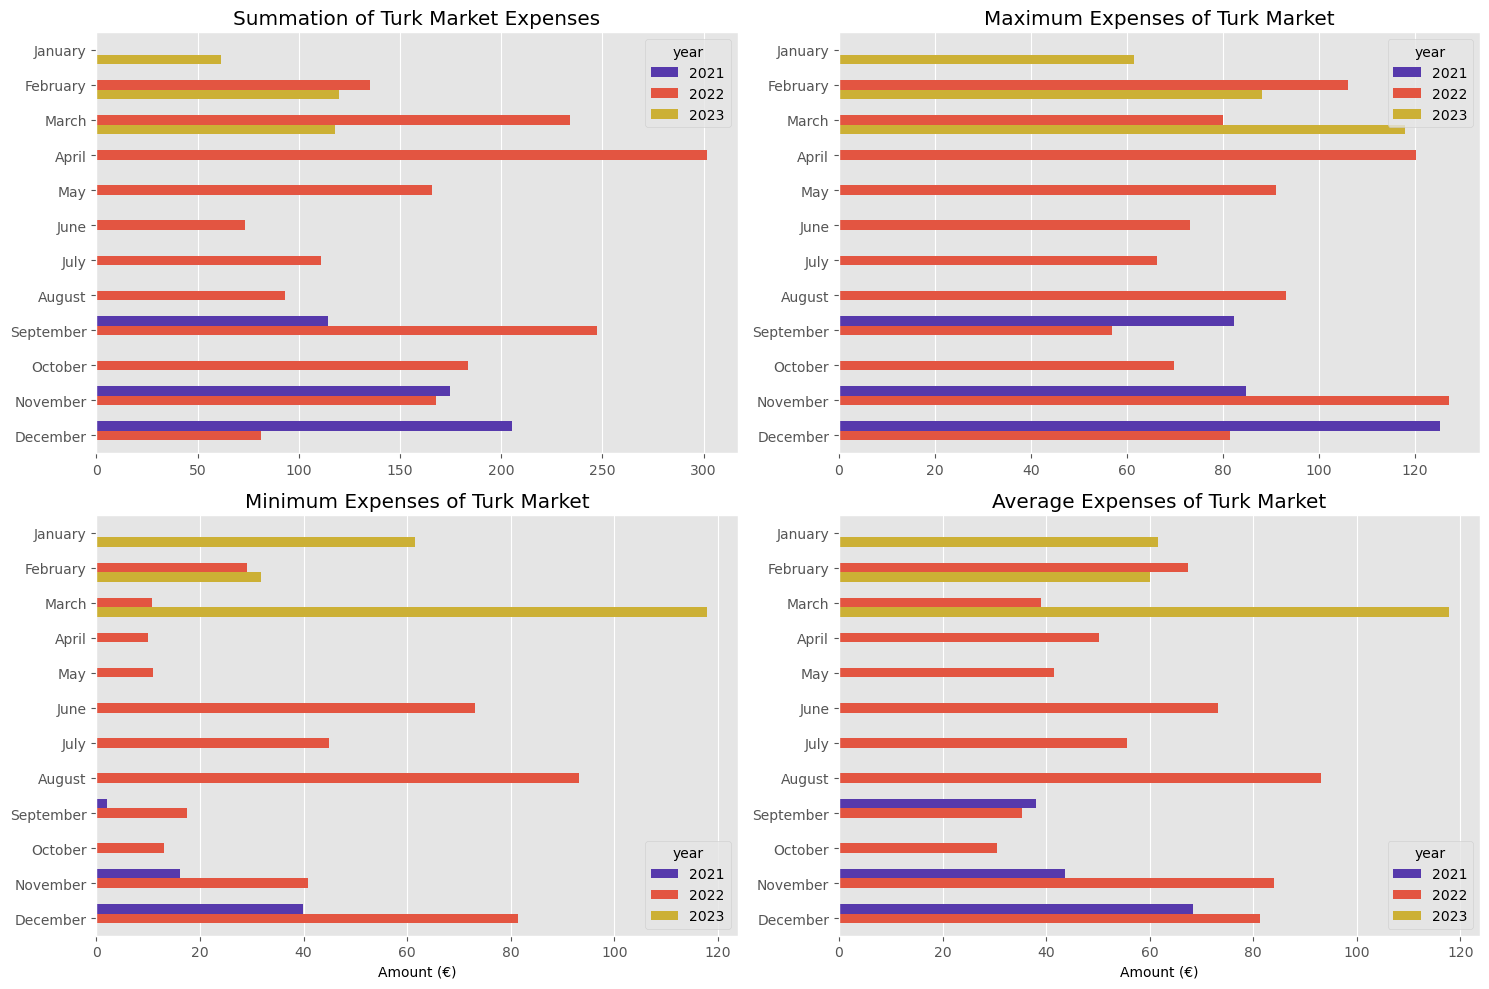

In [95]:
# Create Subplot figure 2x2 dimesion
%matplotlib inline
fig = plt.figure(figsize=(15,10)) # create figure
row_colum=[2,2]
ax0 = fig.add_subplot(row_colum[0], row_colum[1], 1) 
ax1 = fig.add_subplot(row_colum[0], row_colum[1], 2)
ax2 = fig.add_subplot(row_colum[0], row_colum[1], 3)
ax3 = fig.add_subplot(row_colum[0], row_colum[1], 4)

df_filter=df.loc[(df["debit_credit"]=="Debit") & (df["label"]=="Turk market")]
palette="CMRmap"
sns.barplot(x=df_filter["amount"],y=df_filter["month"],hue=df_filter["year"],estimator=sum, errorbar=None, ax=ax0, palette=palette)
sns.barplot(x=df_filter["amount"],y=df_filter["month"],hue=df_filter["year"],estimator="max", errorbar=None, ax=ax1, palette=palette)
sns.barplot(x=df_filter["amount"],y=df_filter["month"],hue=df_filter["year"],estimator="min", errorbar=None, ax=ax2, palette=palette)
sns.barplot(x=df_filter["amount"],y=df_filter["month"],hue=df_filter["year"], estimator="mean",errorbar=None, ax=ax3, palette=palette)
ax0.set_title("Summation of Turk Market Expenses")
ax1.set_title("Maximum Expenses of Turk Market")
ax2.set_title("Minimum Expenses of Turk Market")
ax3.set_title("Average Expenses of Turk Market")

for i in [ax0,ax1,ax2,ax3]:
    i.set_ylabel("")
    i.set_xlabel("")
for i in [ax2,ax3]:
    i.set_xlabel("Amount (\N{euro sign})")

In [ ]:
months = dict(df.groupby("year")["month"].unique())
numberofMonths = dict()
for i in months:
    numberofMonths[i] = len(months[i])
    
grocery_mean=df.loc[(df["debit_credit"]=="Debit") & (df["year"]==2022) & (df["label"]=="Grocery")].groupby(["year","month"])["amount"].sum()

grocery_mean.plot(kind="barh",figsize = (5,10), title="Grocery Expenses according to Months, 2022")
plt.show()
grocery_mean

In [ ]:
df.groupby(["year"])["month"].unique()

In [ ]:
months = dict(df.groupby("year")["month"].unique())
numberofMonths = dict()
for i in months:
    numberofMonths[i] = len(months[i])
for i in numberofMonths:
    print(numberofMonths[i])
for i in numberofMonths.keys():
    print(i*2)

In [ ]:
pd.Timedelta(df.loc[df["Year"] == 2022]["Date"].max() - df.loc[df["Year"] == 2022]["Date"].min())

For year  2021
Turk Market: €82.36 
Grocery: €500.18
For year  2022
Turk Market: €149.53 
Grocery: €531.08
For year  2023
Turk Market: €59.88 
Grocery: €678.21


Year  Turk Market     Grocery
2021  2021       82.355  500.180000
2022  2022      149.525  531.083333
2023  2023       59.880  678.214000

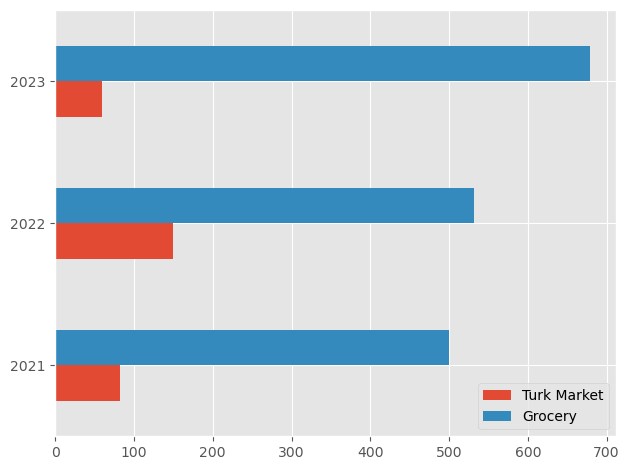

In [124]:
#super market ve turkmarket aylık ortalama
turk=[]
grocery=[]
months = dict(df.groupby("year")["month"].unique())
numberofMonths = dict()
for i in months:
    numberofMonths[i] = len(months[i])

for i in numberofMonths.keys():
    print("For year ",i)
    df_groc=df.loc[(df["debit_credit"]=="Debit") & (df["year"]==i) & (df["label"]=="Grocery")].groupby("year")["amount"].sum()/numberofMonths[i]
    df_turk= (df.loc[(df["debit_credit"]=="Debit") & (df["year"]==i) & (df["label"]=="Turk market")].groupby("year")["amount"].sum()/numberofMonths[i])
    turk.append(df_turk.iloc[0])
    grocery.append(df_groc.iloc[0])
    print("Turk Market: \N{euro sign}{:.2f} ".format(df_turk.iloc[0]))
    print("Grocery: \N{euro sign}{:.2f}".format(df_groc.iloc[0]))
market_mean = {"Year":list(numberofMonths.keys()),
               "Turk Market":turk,
              "Grocery":grocery}
market_mean_df=pd.DataFrame(market_mean,index=market_mean["Year"])
market_mean_df.drop(columns=["Year"],axis= 0).plot(kind="barh")
market_mean_df
#for i in numberofMonths.keys():
#    print("For year ",i)
#    df_turk= (df.loc[(df["debit_credit"]=="Debit") & (df["year"]==i) & (df["label"]=="Turk market")].groupby("year")["amount"].sum()/numberofMonths[i]).sort_values(ascending=False)
#    print("Turk Market:\n {}".format(df_turk))


In [ ]:
df.loc[(df["debit_credit"]=="Debit") & (df["year"]==2022) & (df["label"]=="Grocery")|(df["label"]=="Turk market")].groupby("label").sum()

In [ ]:
df_turk= (df.loc[(df["debit_credit"]=="Debit") & (df["year"]==2022) & (df["label"]=="Turk market")].groupby("year")["amount"].sum()/numberofMonths[2022]).sort_values(ascending=False)
df_turk

In [ ]:
df_market=df.loc[(df["debit_credit"]=="Debit") & (df["year"]==2022) & (df["label"]=="Turk market")].groupby("year")["amount"].sum()
df_market

In [ ]:
df.head()

In [ ]:
#super market ve turkmarket aylık ortalama
months = dict(df.groupby("year")["month"].unique())
numberofMonths = dict()
for i in months:
    numberofMonths[i] = len(months[i])

for i in numberofMonths.keys():
    print("For year ",i)
    df_market=df.loc[(df["debit_credit"]=="Debit") & (df["year"]==i) & (df["label"]=="Grocery|Turk Market")].groupby("year")["amount"].sum()/numberofMonths[i]
    print(df_market)
    print("Grocery:\n {}".format(df_market))

In [ ]:
months
numberofMonths

In [ ]:
pd.DataFrame(df.loc[(df["debit_credit"]=="Debit") & (df["year"]==2022) & (df["label"]=="Grocery")].groupby("year")["amount"].sum()/10)

In [ ]:
df.loc[(df["debit_credit"]=="Debit") & (df["year"]==2022)].groupby(["day","year"])[["amount"]].aggregate(["mean", max,np.sum]).T

In [ ]:
df["Month"].dtypes

day        Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
month                                                                    
January     75.53   207.05      64.94    229.76   54.59     52.26   71.91
February   176.19    75.64       0.00     77.63   69.96     21.47   62.76
March        6.62   166.04      69.78     68.19   64.99     32.16   35.50
April      102.62   132.50     138.10      0.00   57.16     24.09   18.48
May        146.33   118.87      37.10      6.36    0.00     53.04  207.78
June       141.29    98.19      97.89     76.69  123.74      0.00    0.00
July        27.54    57.36     160.93     89.01   20.84      0.00  143.99
August      29.12     0.00     156.37      0.00    0.00      0.00   72.62
September  159.65    17.87     102.35     68.46  155.44     28.91  124.49
October     43.19    53.74       0.00    107.82  100.04     64.11   76.32
November    87.72   103.69     116.83     44.76  109.76     95.22    0.00
December    55.97    43.98      32.97    181.50   71.73    149.80  155.70

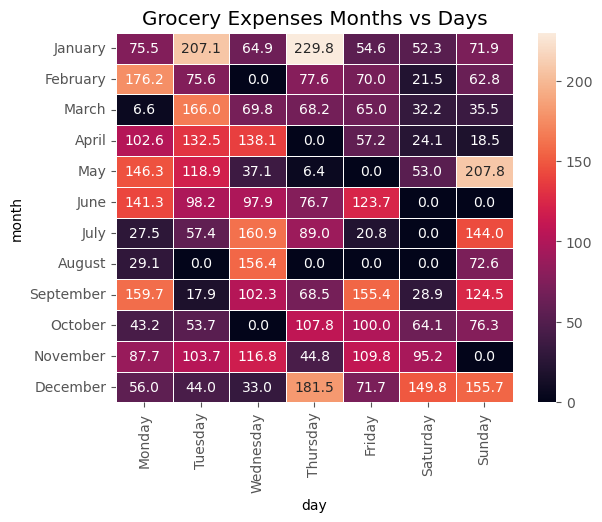

In [13]:
heat_df=df.loc[(df["debit_credit"]=="Debit") & (df["year"]==2022) & (df["label"]=="Grocery")].pivot_table(values="amount",index = ["month"], columns = "day",aggfunc="sum")
heat_df.fillna(0,inplace=True)
#heat map yap
sns.heatmap(heat_df,annot=True, fmt=".1f", linewidth=.5)
plt.title("Grocery Expenses Months vs Days")
heat_df

<Axes: xlabel='day', ylabel='month'>

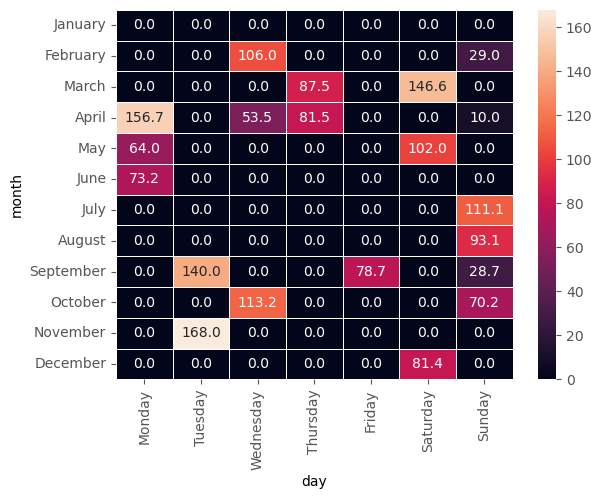

In [14]:
heat_df=df.loc[(df["debit_credit"]=="Debit") & (df["year"]==2022) & (df["label"]=="Turk market")].pivot_table(values="amount",
                                                                                                          index = ["month"], columns = "day",aggfunc="sum")
heat_df.fillna(0,inplace=True)
#heat map yap
sns.heatmap(heat_df,annot=True, fmt=".1f", linewidth=.5)

<Axes: xlabel='day', ylabel='month'>

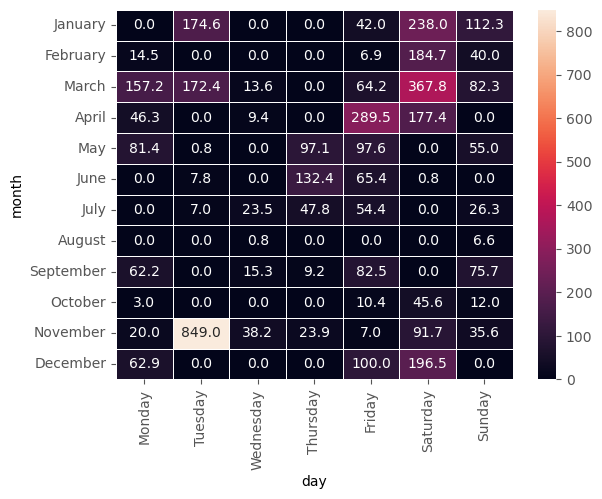

In [15]:
heat_df=df.loc[(df["debit_credit"]=="Debit") & (df["year"]==2022) & (df["label"]=="Store")].pivot_table(values="amount",
                                                                                                          index = ["month"], columns = "day",aggfunc="sum")
heat_df.fillna(0,inplace=True)
#heat map yap
sns.heatmap(heat_df,annot=True, fmt=".1f", linewidth=.5)

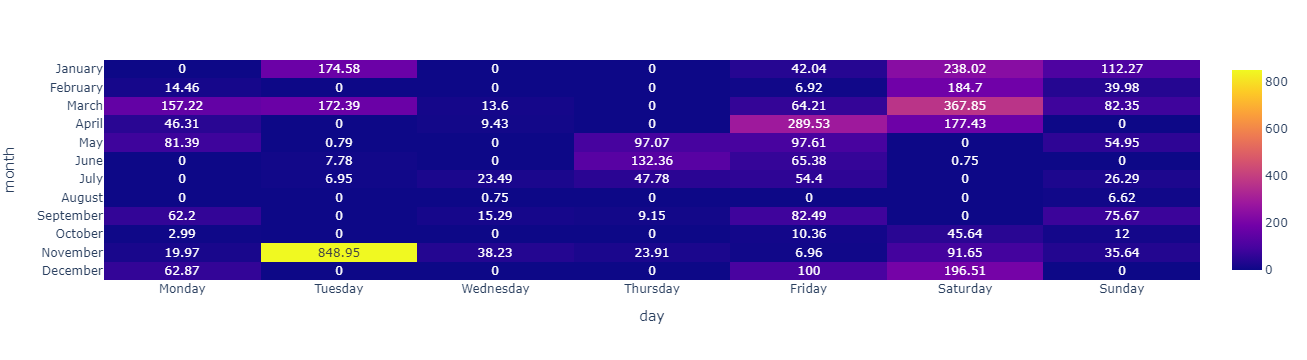

In [16]:
import plotly.express as px
heat_df.values.tolist
fig=px.imshow(heat_df,text_auto=True, aspect="auto")
fig.show()

In [ ]:
df.loc[(df["debit_credit"]=="Credit") & (df["year"]<=2023)].head(30)

In [ ]:
df.loc[df["Debit/credit"]=="Credit"]

In [129]:
df.to_csv("expenses.csv",index=False)

In [ ]:
with pd.ExcelWriter('expenses.xlsx') as writer:  
    df.to_excel(writer, sheet_name="all")
    #df_income.to_excel(writer, sheet_name='income')
    #df_expense.to_excel(writer, sheet_name='expense')

In [ ]:
w=pd.DataFrame({"year":numberofMonths.keys(),"numberofmonths":numberofMonths.values()}).set_index("year")
w

In [ ]:
a["amount"].sum()/numberofMonths[year_]

In [ ]:
df

In [ ]:
Report = pd.DataFrame({'Algorithm' : ['LogisticRegression', 'KNN', 'SVM', 'Decision Tree']}).set_index("Algorithm")

In [ ]:
Report

In [ ]:
# Import required libraries

import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Read the airline data into pandas dataframe
year_min = df["year"].min()
year_max = df["year"].max()
year_list = df["year"].unique()

# Create a dash application
app = dash.Dash(__name__)


# Create an app layout
app.layout = html.Div([
    html.H1('Descriptive Analyses of Expenses', style={'textAlign': 'center', 'color': '#503D36','childrennt-size': 40}),
    html.Div(children=[
        html.Label('Select Month'),
        # TASK 1: Add a dropdown list to enable Launch Site selection
        # The default select value is for ALL sites
        dcc.Dropdown(id='month-dropdown',options=[
            {"label":"All","value":"ALL"},
            {"label":"January","value":"January"},
            {"label":"February","value":"February"},
            {"label":"March","value":"March"},
            {"label":"April","value":"April"},
            {"label":"May","value":"May"},
            {"label":"June","value":"June"},
            {"label":"July","value":"July"},
            {"label":"August","value":"August"},
            {"label":"September","value":"September"},
            {"label":"October","value":"October"},
            {"label":"November","value":"November"},
            {"label":"December","value":"December"}],
            value="ALL",
            placeholder="Select Month",
            searchable=True),

        html.Br(),
        html.Label('Select Day'),
        dcc.Dropdown(id='day-dropdown',options=[
            {"label":"All","value":"ALL"},
            {"label":"Monday","value":"Monday"},
            {"label":"Tuesday","value":"Tuesday"},
            {"label":"Wednesday","value":"Wednesday"},
            {"label":"Thursday","value":"Thursday"},
            {"label":"Friday","value":"Friday"},
            {"label":"Saturday","value":"Saturday"},
            {"label":"Sunday","value":"Sunday"}],
            style={'width': '50%', #'height': '60px', #'lineHeight': '60px',#'borderWidth': '1px',#'borderStyle': 'dashed',
                   'borderRadius': '5px',
                   'margin': '10px'},
            value="ALL",
            multi=True,
            placeholder="Select Day",
            searchable=True),
    ], style={'padding': 10, 'flex': 1}),

    html.Div(children=[
        html.Label('Select Year'),
        dcc.Dropdown(id='year-dropdown',
             options=[{"label":"All", "value":"All"},year_list],
             value="ALL",
             placeholder="Select Year",
             multi=True,
             searchable=True),
        html.Br(),
        
        html.Label('Checkboxes'),
        dcc.Checklist(year_list,
                      year_list
        ),

        html.Br(),
        html.Label('Slider'),
        dcc.Slider(
            min= year_min,
            max=year_max,
            marks={i: f'Label {i}' if i == 1 else str(i) for i in range(year_min, year_max+1)},
            value=year_max-year_min,
        ),
    ], style={'padding': 10, 'flex': 1})
], style={'display': 'flex', 'flex-direction': 'row'})



# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output
@app.callback(Output(component_id="success-pie-chart", component_property="figure"),
            Input(component_id="site-dropdown", component_property="value"))
def get_pie_chart(entered_site):
    filtered_df=spacex_df
    if entered_site == "ALL":
        fig = px.pie(filtered_df, values="class",names="Launch Site",title= "Total Launches for All Sites")
        return fig
    else:
        filtered_df = spacex_df.loc[spacex_df["Launch Site"] == entered_site]
        fig = px.pie(filtered_df, names="class", title= "Total Launches for a Specific Site {} ".format(str(entered_site)))
        return fig
# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output
@app.callback(Output(component_id="success-payload-scatter-chart",component_property="figure"),
            Input(component_id="site-dropdown",component_property="value"),
            Input(component_id="payload-slider",component_property="value"))
def get_scatter_chart(entered_site,payload_slider):
    if entered_site=="ALL":
        filtered_df=spacex_df.loc[(spacex_df["Payload Mass (kg)"]>= payload_slider[0]) & 
        (spacex_df["Payload Mass (kg)"]<=payload_slider[1])]
        fig = px.scatter(filtered_df, x="Payload Mass (kg)", y="class", 
                        color="Booster Version Category")
        return fig
    else:
        filtered_df= spacex_df.loc[(spacex_df["Payload Mass (kg)"]>=payload_slider[0])&
                                    (spacex_df["Payload Mass (kg)"]<=payload_slider[1])&
                                    (spacex_df["Launch Site"]==entered_site)]
        fig = px.scatter(filtered_df,x="Payload Mass (kg)", y="class",
                        color="Booster Version Category")
        return fig


# Run the app
if __name__ == '__main__':
    app.run_server()

In [111]:
df["date"].max()

datetime.date(2023, 5, 25)

In [ ]:
!pip install dash